<center><h1>
تمرین عملی دوم
</h1></center>

<div dir="rtl">
در این تمرین می‌خواهیم یک بازی ساده و تاثیر تکرار بازی را با هم بررسی کنیم. در هر مرحله کافی‌ست توابع معرفی‌شده را پیاده‌سازی کنید.

لطفا برای اطمینان از محل اجرا، قطعه‌کد پایین را اجرا کنید.
</div>

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
%%bash
if [ ! -d game_environment ]; then
    echo "/Users/mac/Desktop/GameTheoryHW2-main/game_environment"
    exit -1
fi

pip install matplotlib
pip install numpy

<div dir="rtl">
<h2>یک تصمیم ساده (۵ نمره)</h2>
در این بازی می‌خواهیم مبلغی را بین دو نفر پخش کنیم. در صورتی که دو نفر به توافق برسند، مبلغ مطابق توافق آن‌ها بین‌شان پخش می‌گردد، در غیر این‌صورت به هیچ‌یک از آن‌ها مبلغی تعلق نمی‌گیرد.

برای پیاده‌سازی بازی لازم است توابع `generate_offer` و `receive_offer` را در قطعه‌کد زیر پیاده‌سازی کنید.

تابع `generate_offer` در ورودی خود مقداری که باید پخش شود را ورودی گرفته و در خروجی یک دوتایی برمی‌گرداند که مقدار اول سهم خودش از توافق را مشخص می‌کند و مقدار دوم سهم نفر دیگر را. بدیهی‌ست که باید مجموع این دو مقدار برابر با کل مقدار دریافتی باشد.

تابع `receive_offer` یک دوتایی دریافت می‌کند که مقدار اول سهم نفر دیگر از توافق و مقدار دوم سهم بازیکن را از توافق مشخص می‌کند. تضمین می‌شود که مجموع این دو مقدار برابر کل مقداری‌ست که باید پخش شود. در خروجی این تابع در صورت تایید توافق مقدار `True` و در غیر این‌صورت باید مقدار `False` برگردانده شود.

In [3]:
from typing import Tuple
from game_environment import Strategy

class MySimpleStrategy(Strategy):
    def generate_offer(self, value: int, **kwargs):

        return (value -1, 1)

    def receive_offer(self, offer: Tuple[int, int], **kwargs):

        return offer[1] >= offer[0]

<div dir="rtl"> <font color="green">
این قسمت را با توضیح استراتژی استفاده‌شده توسط شما در قسمت قبل (علت بهینه بودن آن بدون داشتن اطلاعات بیشتر) کامل کنید.
</font></div>

<div dir="rtl"> <font color="aqua">
برای قسمت یک تصمیم ساده اگر تصمیم بگیریم که همیشه موافق مبلغ توافق شده باشیم، سود خواهیم کرد و در نتیجه از قبول کردن هیچ معامله‌ای ضرر نمی‌کنیم و در برد هستیم.  
</font></div>

<div dir="rtl">
حال یک جامعه‌ی ۲۰ نفره در نظر می‌گیریم و همچنین علاوه بر استراتژی مشخص‌شده توسط شما، از چند استراتژی دیگر هم استفاده می‌کنیم. نحوه‌ی عملکرد این استراتژی‌ها را در قطعه‌کد زیر می‌توانید مشاهده کنید.

در ده‌هزار مرحله، در هر مرحله دو فرد تصادفی از جامعه انتخاب می‌کنیم و بین آن دو یک بازی برگزار می‌کنیم. نتایج را با تهیه‌ی پلات می‌توانید مشاهده کنید.
</div>

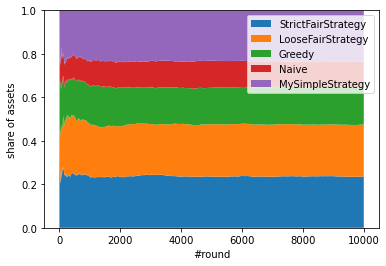

Final share of assets:
* StrictFairStrategy:		24%
* LooseFairStrategy:		24%
* Greedy:		17%
* Naive:		12%
* MySimpleStrategy:		23%


In [4]:
from game_environment import GameConfiguration, GameRunner, Strategy

class StrictFairStrategy(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value / 2, value / 2]

    def receive_offer(self, offer, **kwargs):
        return offer[1] >= offer[0]


class LooseFairStrategy(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value / 2, value / 2]

    def receive_offer(self, offer, **kwargs):
        return offer[1] > 0


class Greedy(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value * 99 / 100, value / 100]

    def receive_offer(self, offer, **kwargs):
        return offer[1] >= offer[0] * 90


class Naive(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value / 100, value * 99 / 100]

    def receive_offer(self, offer, **kwargs):
        return offer[1] > 0


game_configuration = GameConfiguration(
    strategies=[StrictFairStrategy() for i in range(4)]
    + [LooseFairStrategy() for i in range(4)]
    + [Greedy() for i in range(4)]
    + [Naive() for i in range(4)]
    + [MySimpleStrategy() for i in range(4)],
    games=10000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


<div dir="rtl"> <font color="green">
این قسمت را با توجیه نمودار ساخته‌شده کامل کنید. توجه کنید تنها در صورتی نمره‌ی این قسمت را می‌گیرید که در نهایت استراتژی شما بیش از یک پنجم سرمایه تولید‌شده را دارا باشد.
</font></div>

<div dir="rtl"> <font color="aqua">
این قسمت با توجه به نمودار ساخته شده به‌نحوی کامل می‌شود که از قبول کردن هیچ معامله‌ای ضرر نمی‌کنیم و در صورت برد سود می‌کنیم.  
</font></div>

<div dir="rtl">
<h2>یک تصمیم سخت (۲۰ + ۱۰ نمره)</h2>
در این قسمت می‌خواهیم تاثیر اعتبار بر این بازی را بررسی کنیم. برای این کار، در هنگام ارائه‌ی پیشنهاد و دریافت آن علاوه بر موارد قبلی که دریافت می‌کردید، لیستی از مذاکراتی که قبلا انجام شده هم دریافت می‌کنید.

به عنوان مثال یک استراتژی نمونه در اختیارتان قرار گرفته است. در این استراتژی، در صورتی که دارایی شخص بیشتر از طرف مقابل باشد، کل مبلغ (و یا آن‌چه او پیشنهاد داده) را به او می‌بخشد و در غیر این صورت، در غیر این‌صورت به او پیشنهاد یک درصد مبلغ را می‌دهد و یا تنها در صورتی پیشنهاد او را قبول می‌کند که اکیدا به نفع او باشد.

شما هم استراتژی‌های زیر را پیاده‌سازی کنید:

تعریف: یک فرد را طمع‌کار می‌نامیم اگر در بیش از نیمی از مذاکرات موفقش، بیش از نیمی از مبلغ را برداشته باشد.

1. به هر شخصی پیشنهاد عادلانه‌ی نصف مبلغ را بدهد و به افراد طمع‌کار پیشنهاد یک درصد مبلغ را بدهد تا تنبیه شوند. همچنین هر پیشنهادی را قبول کند مگر این که شخص طمع‌کاری پیشنهادی کمتر از نصف مبلغ داده‌باشد. این استراتژی را `AntiGreedy` می‌نامیم.
1. هنگام دریافت پیشنهاد هر پیشنهاد بزرگ‌تر از صفری را قبول می‌کند و هنگام ارائه‌ی پیشنهاد در صورتی که حداقل نیمی از مذاکرات طرف مقابل با افراد طمع‌کار به توافقی با حداقل نصف مبلغ به سود فرد طمع‌کار تمام‌شده باشد، پیشنهاد یک درصد مبلغ را می‌دهد و در غیر این‌صورت نیمی از مبلغ را پیشنهاد می‌دهد. این استراتژی را `GeniusGreedy` می‌نامیم.
1. در هنگام دریافت پیشنهاد، در صورتی که بزرگتر از صفر باشد آن را قبول می‌کند و در هنگام ارائه‌ی پیشنهاد در صورتی که در آخرین بازی‌ای که طرف مقابل پیشنهاد ارائه داده، برای خودش مبلغ کمترمساوی نصف مبلغ را قرار داده باشد، به او کل مبلغ را پیشنهاد می‌دهد و در غیر این‌صورت نیمی از مبلغ را پیشنهاد می‌دهد. این استراتژی را `FairSupporter` می‌نامیم.
1. یک استراتژی مدنظر شما.

پس از پیاده‌سازی این سناریوها مطابق قسمت قبل، جامعه‌ای ۲۰ نفره با این افراد درست کنید و نشان دهید چگونه تغییر نسبت افراد به نتایج مختلفی در توزیع نهایی دارایی منجر می‌شود.


در نهایت استراتژی آخر هر یک از دانشجویان در یک جامعه قرار می‌گیرند و ۱۰ نمره از این قسمت مطابق عملکرد استراتژی در آن جامعه منظور می‌گردد.
</div>

In [5]:
from collections import defaultdict
def get_assets(previous_games):
    assets = defaultdict(lambda: 0)
    for game in previous_games:
        if game['accepted']:
            assets[game['initial giver']] += game['offers'][-1][0]
            assets[game['initial receiver']] += game['offers'][-1][1]
    return assets

def get_greedy(previous_games):
    bads = defaultdict(lambda: 0)
    totals = defaultdict(lambda: 0)
    for game in previous_games:
        if game['accepted']:
            for player_idx in [game['initial giver'],
                               game['initial receiver']]:
                totals[player_idx] += 1

            if game['offers'][-1][0] > game['offers'][-1][1]:
                bads[game['initial giver']] += 1
            elif game['offers'][-1][0] < game['offers'][-1][1]:
                bads[game['initial receiver']] += 1

    greedy = defaultdict(lambda: False)
    for player_idx in totals:
        greedy[player_idx] = bads[player_idx] > totals[player_idx]/2
    return greedy

def is_greedy(player_idx, previous_games):
    return get_greedy(previous_games)[player_idx]

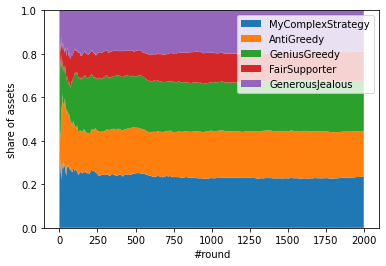

Final share of assets:
* MyComplexStrategy:		24%
* AntiGreedy:		21%
* GeniusGreedy:		23%
* FairSupporter:		13%
* GenerousJealous:		19%


In [6]:
from game_environment import GameConfiguration, GameRunner, Strategy
from typing import Any, Dict, List, Tuple


class MyComplexStrategy(Strategy):
    """
    Each game is represented by a dictionary:
    {
        "initial giver": player_idx (int),
        "initial receiver": player_idx (int),
        "offers": List of offers where each entry is a tuple
                    where the first entry represents initial giver's
                    share and second entry represents initial
                    receiver's share. Here the list has only one offer
                    as the decision has to be made then. (List[Tuple[int, int]])
        "accepted": If the last offer was accepted. (bool)
    }
    """

    def generate_offer(
        self,
        value: int,
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        receiver_idx: int,
    ):
        assets = get_assets(previous_games)
        greedy = get_greedy(previous_games)
        
        bad = 0
        total = 0
        for game in previous_games:
            other_idx = None 
            other_value = None
            total_value = game['offers'][-1][0] + game['offers'][-1][1]
            if game['initial giver'] == receiver_idx:
                other_value = game['offers'][-1][1]
                other_idx = game['initial receiver']
            elif game['initial receiver'] == receiver_idx:
                other_value = game['offers'][-1][0]
                other_idx = game['initial giver']
                
            if other_idx and greedy[other_idx]:
                total += 1
                if other_value > total_value - other_value:
                    bad += 1
                    
        return (value -1, 1) if bad > total/2 or assets[your_idx] < assets[receiver_idx] else (value/2, value/2)

    def receive_offer(
        self,
        offer: Tuple[int, int],
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        giver_idx: int,
    ):
        assets = get_assets(previous_games)
        current_state = assets[your_idx] > assets[giver_idx]
        next_state = assets[your_idx] + offer[1] > assets[giver_idx] + offer[0]
        return offer[1] >= offer[0] or (offer[1] > 0 and (next_state or not current_state))
    
class AntiGreedy(Strategy):
    def generate_offer(self, value, previous_games, your_idx, receiver_idx):
        return (value * .99, value * .01) if is_greedy(receiver_idx, previous_games) else (value/2, value/2)
    def receive_offer(self, offer, previous_games, giver_idx, your_idx):
        return offer[1] >= offer[0] or not is_greedy(giver_idx, previous_games)
    
class GeniusGreedy(Strategy):
    def generate_offer(self, value, previous_games, your_idx, receiver_idx):
        greedy = get_greedy(previous_games)
        
        bad = 0
        total = 0
        for game in previous_games:
            other_idx = None
            other_value = None
            total_value = game['offers'][-1][0] + game['offers'][-1][1]
            if game['initial giver'] == receiver_idx:
                other_value = game['offers'][-1][1]
                other_idx = game['initial receiver']
            elif game['initial receiver'] == receiver_idx:
                other_value = game['offers'][-1][0]
                other_idx = game['initial giver']
                
            if other_idx and greedy[other_idx]:
                total += 1
                if other_value > total_value - other_value:
                    bad += 1
                    
        return (value * .99, value * .01) if bad > total/2 else (value/2, value/2)
    
    def receive_offer(self, offer, previous_games, giver_idx, your_idx):
        return offer[1] > 0
    
class FairSupporter(Strategy):
    def generate_offer(self, value, previous_games, your_idx, receiver_idx):
        for game in previous_games[::-1]:
            if game['initial receiver'] == receiver_idx and game['offers'][-1][0] <= game['offers'][-1][1]:
                return (0, value)
        return (value/2, value/2)
    
    def receive_offer(self, offer, previous_games, giver_idx, your_idx):
        return offer[1] > 0
            

class GenerousJealous(Strategy):
    def generate_offer(self, value, previous_games, your_idx, receiver_idx):
        assets = {your_idx: 0, receiver_idx: 0}
        assets.update(get_assets(previous_games))
        if assets[your_idx] < assets[receiver_idx]:
            return [value*99/100, value/100]
        else:
            return [value/100, value*99/100]

    def receive_offer(self, offer, previous_games, giver_idx, your_idx):
        assets = {your_idx: 0, giver_idx: 0}
        assets.update(get_assets(previous_games))
        if assets[your_idx] < assets[giver_idx]:
            return offer[1] > offer[0]
        return True


game_configuration = GameConfiguration(
    strategies=[MyComplexStrategy() for i in range(4)]
    + [AntiGreedy() for i in range(4)]
    + [GeniusGreedy() for i in range(4)]
    + [FairSupporter() for i in range(4)]
    + [GenerousJealous() for i in range(4)],
    games=2000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


<div dir="rtl"> <font color="aqua">
در نهایت مشاهده می‌شود که استراتژی ما بیش از یک پنجم استراتژی داده شده را دارا می‌باشد.
</font></div>

<div dir="rtl">
<h2>دو تصمیم ساده (۱۵ نمره)</h2>
در این قسمت مشابه قسمت قبل، اطلاعی از شخصیت و یا استراتژی طرف مقابل ندارید، با این حال در صورتی که پیشنهاد طرف مقابل را نپذیرید، می‌توانید یک پیشنهاد متقابل به او ارائه دهید.

مثلا فرض کنید طرف مقابل به شما پیشنهاد می‌دهد که تمام مقدار را خودش بردارد. در صورتی که در `receive_offer` مقدار `True` برگردانید، توافق مطابق قسمت قبل انجام می‌شود، در غیر این‌صورت تابع `generate_offer` شما صدا زده می‌شود تا پیشنهادی متقابل ارائه کنید. شرایط این پیشنهاد مطابق یک پیشنهاد عادی‌ست.

برای این که بتوانید حالت کنونی خود را به خوبی دنبال کنید، در ابتدای هر دوره از مذاکرات، تابع `start_round` صدا زده می‌شود.

مشابه قسمت قبل چند استراتژی ساده‌ی دیگر وجود دارند که با آن‌ها رقابت می‌کنید.
</div>

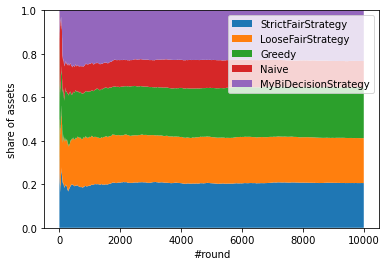

Final share of assets:
* StrictFairStrategy:		21%
* LooseFairStrategy:		21%
* Greedy:		23%
* Naive:		12%
* MyBiDecisionStrategy:		23%


In [7]:
from game_environment import GameConfiguration, GameRunner, Strategy


class MyBiDecisionStrategy(Strategy):
    def start_round(self):
        # [OPTIONAL] TODO: Your code here.
        ...
        self.previous_offers = []

    def generate_offer(self, value, **kwargs):
        if len(self.previous_offers) == 0:
            self.previous_offers.append(value - 1)
        else:
            self.previous_offers.append(value / 2)
        return (self.previous_offers[-1], value - self.previous_offers[-1])

    def receive_offer(self, offer, **kwargs):
        return offer[1] > offer[0]


game_configuration = GameConfiguration(
    strategies=[StrictFairStrategy() for i in range(4)]
    + [LooseFairStrategy() for i in range(4)]
    + [Greedy() for i in range(4)]
    + [Naive() for i in range(4)]
    + [MyBiDecisionStrategy() for i in range(4)],
    games=10000,
    offers=2,
    player2_offers=True,
)
games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


<div dir="rtl"> <font color="green">
در این قسمت استراتژی خود را توجیه کنید. همچنین در صورتی استراتژی شما در مقابل یک بازیکن منطقی بهینه، نیست با بیان و اثبات استراتژی بهینه، توضیح دهید چرا در این شرایط این استراتژی را ترجیح دادید. توجه کنید تنها در صورتی نمره‌ی این قسمت را می‌گیرید که در نهایت استراتژی شما بیش از یک پنجم سرمایه تولید‌شده را دارا باشد.
</font></div>

<div dir="rtl"> <font color="aqua">
از آنجایی که در این قسمت نیز اطلاعی از استراتژی نفر مقابل نداریم، مانند قسمت قبل پیاده‌سازی می شود، با این تفاوت که اگر پیشنهاد طرف مقابل را نپذیریم، می‌توانیم به نفر مقابل پیشنهاد متقابل را ارائه کنیم درنتیجه استراتژی‌ای پیاده کردیم تا در ابتدا پیشنهادی که نمی‌تواند رد شود و کاملا پر سود است را ارائه دهیم و در صورتی که حتی ۱٪ هم رد شد پیشنهاد نصف کردن مبلغ را به نفر مقابل می‌دهیم، اما اگر در این جامعه آماری‌ای که داریم همگی طمع کار باشند، این استراتژی اصلا خوب عمل نمی‌کند و به‌شدت گند می‌زند!!! حتی اگر فقط بیش از نصف جامعه هم طمع کار باشند، باز هم این استراتژی جواب نمی‌دهد و خرابکاری می‌کند، اما از آنجایی که فرض می‌کنیم نسبت خوبی از افراد رشنال هستند می‌توانیم بگوییم که این استراتژی خوب عمل می‌کند. 
</font></div>

<div dir="rtl">
<h2>چند تصمیم ساده (۲۰+۱۰ نمره)</h2>
در این قسمت مشابه قسمت قبل، اطلاعی از شخصیت و یا استراتژی طرف مقابل ندارید، و می‌توانید در صورتی که پیشنهاد طرف مقابل را نپذیرید، یک پیشنهاد متقابل به او ارائه دهید اما این روند پیشنهاد متقابل `k` بار ادامه پیدا می‌کند و در هر مرحله هر کس بعد از رد کردن پیشنهاد، یک پیشنهاد متقابل ارائه می‌کند. به عبارت دیگر قسمت قبل، حالت خاصی با `k=2` است.

مشابه قسمت قبل از استراتژی‌های دیگر در کنار استراتژی خود استفاده کنید و نتیجه را با `k=5` و `k=10` نمایش دهید. توجه کنید که `k` را با استفاده از متغیر `offers` می‌توانید در تنظیمات بازی مشخص کنید.

مشابه قبل، یک جامعه‌ی دیگر با دانشجوهای درس تشکیل می‌شود و با یک `k` ثابت، بازی‌ها انجام می‌شوند. لطفا استراتژی خود را برای این جامعه هم مشخص کنید. عملکرد شما در این بخش، ۱۰ نمره از این قسمت را در بر می‌گیرد.
</div>

In [8]:
from game_environment import GameConfiguration, GameRunner, Strategy

class MyKayDecision(Strategy):
    def __init__(self, k=1):
        super().__init__()
        self.k = k
        self.previous_offers = [0]
        
    def start_round(self):
        self.previous_offers = [0]
        
    def generate_offer(self, value, **kwargs):
        self.previous_offers.append(self.previous_offers[-1] + 1)
        if len(self.previous_offers) > self.k:
            a = value - self.previous_offers[-1]
            b = self.previous_offers[-1]
            return (a, b) if a > b else (value/2, value/2)
        else:
            return (value/2, value/2)
        
    def receive_offer(self, offer, **kwargs):
        return offer[1] > offer[0]


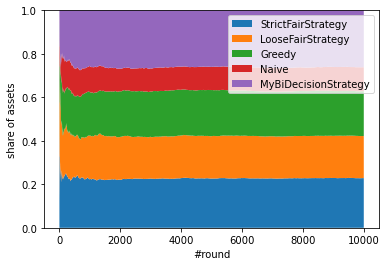

Final share of assets:
* StrictFairStrategy: 23%
* LooseFairStrategy: 19%
* Greedy: 21%
* Naive: 11%
* MyBiDecisionStrategy: 26%


In [9]:
game_configuration = GameConfiguration(
    strategies = [StrictFairStrategy() for i in range(4)] 
               + [LooseFairStrategy() for i in range(4)] 
               + [Greedy() for i in range(4)] 
               + [Naive() for i in range(4)] 
               + [MyBiDecisionStrategy() for i in range(4)],
    games=10000,
    offers=5,
    player2_offers=True
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}: {}%".format(key, round(100*assets[key]/sum(assets.values()))))


<div dir="rtl"> <font color="aqua">
تغییر گذر از k=5 به k=10:
</font></div>

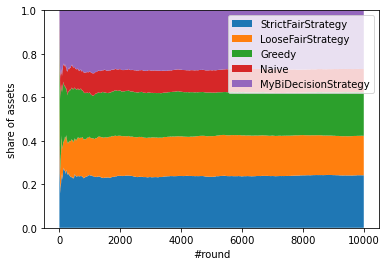

Final share of assets:
* StrictFairStrategy: 24%
* LooseFairStrategy: 18%
* Greedy: 20%
* Naive: 11%
* MyBiDecisionStrategy: 27%


In [10]:
game_configuration = GameConfiguration(
    strategies = [StrictFairStrategy() for i in range(4)] 
                + [LooseFairStrategy() for i in range(4)] 
                + [Greedy() for i in range(4)] 
                + [Naive() for i in range(4)] 
                + [MyBiDecisionStrategy() for i in range(4)],
    games=10000,
    offers=10,
    player2_offers=True
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}: {}%".format(key, round(100*assets[key]/sum(assets.values()))))


<div dir="rtl"> <font color="green">
در این قسمت استراتژی خود را توجیه کنید. همچنین توضیح دهید گذر از `k=5` به `k=10` چه تغییری در نتیجه‌ی هر مذاکره به وجود می‌آورد. علاوه بر این نشان دهید که هر سری از مذاکرات با `k` مرحله با فرض بازیکن‌های منطقی به چه نتیجه‌ی نهایی‌ای می‌رسد.
</font></div>

<div dir="rtl"> <font color="aqua">
برای این قسمت نیز همانند قسمت‌های قبل کد را پیاده‌سازی کردیم، با این تفاوت که سود طرف مقابل را در هر پیشنهاد افزایش می‌دهیم و تا نصف شدن مبلغ مورد نظر پیش می‌رویم، با توجه به اینکه در این قسمت تعداد پیشنهادهای ما افزایش داشته به‌طور مثال در قسمت قبلی ۲ پیشنهاد داشتیم ولی در این قسمت ۵ پیشنهاد و ۱۰ پیشنهاد نیز داشتیم، در نتیجه به‌سبب این افزایش تعداد offer میزان درصد موفقیت نیز افزایش پیدا می‌کند و همین امر دلیل افزایش سود ما در این بازی نسبت به بازی قبل است. اگر فرض کنیم که تمامی بازیکنان رشنال عمل می‌کنند، در نهایت دآمد نهایی همگی بازیکنان برابر می‌شود. 
</font></div>